In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Probably gonna have to analyze order profit within this data set I dont think I could find a trend for the delivery status

In [79]:
df = pd.read_csv('Cleaned_Supply_Chain.csv')

In [80]:
df.shape

(180519, 43)

In [81]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order_Profit,Order Region,Order State,Order Status,Product Category Id,Product_Name,Product Price,Product Status,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,0,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,0,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,0,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,0,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,0,Standard Class


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [85]:
#df.rename(columns = {'Type':'Payment_Method'})
#df.head()

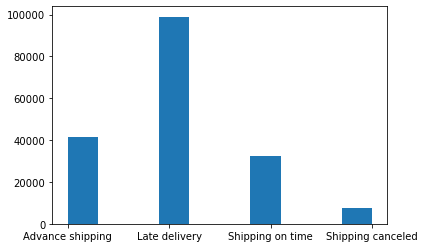

In [83]:
ax = plt.hist(df['Delivery Status'])

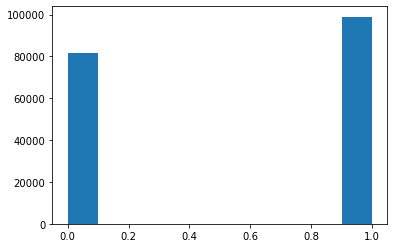

In [84]:
ax = plt.hist(df['Late_delivery_risk'])

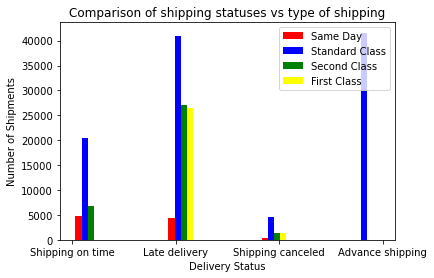

In [86]:
# Analyzing Shipping Mode with Delivery status

same_day = df[df['Shipping Mode'] == 'Same Day']
standard_class = df[df['Shipping Mode'] == 'Standard Class']
second_class = df[df['Shipping Mode'] == 'Second Class']
first_class = df[df['Shipping Mode'] == 'First Class']

same_day_result = same_day['Delivery Status']
standard_class_result = standard_class['Delivery Status']
second_class_result = second_class['Delivery Status']
first_class_result = first_class['Delivery Status']

_ = plt.hist([same_day_result, standard_class_result, second_class_result,first_class_result],
            color = ['red','blue','green','yellow'])
_ = plt.legend(['Same Day','Standard Class','Second Class','First Class'])
_ = plt.xlabel('Delivery Status')
_ = plt.ylabel('Number of Shipments')
_ = plt.title('Comparison of shipping statuses vs type of shipping')


# Every first class shipment was delayed or cancelled. No shipping type but standard had advance shipping

In [23]:
# Did certain kinds of chipments have increased average delays removing canceled shipments
#df.head()
#df2 = df[df['Delivery Status'] != 'First Class']


In [87]:
df['Delivery Difference'] =  df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# No delays
#df3 = df2[df2['Delivery Difference'] != 0]

same_day_delay = df[df['Shipping Mode'] == 'Same Day']
standard_delay = df[df['Shipping Mode'] == 'Standard Class']
second_delay = df[df['Shipping Mode'] == 'Second Class']
first_delay = df[df['Shipping Mode'] == 'First Class']

same_day_delay_difference_mean = np.mean(same_day_delay['Delivery Difference'])
standard_delay_difference_mean = np.mean(standard_delay['Delivery Difference'])
second_delay_difference_mean = np.mean(second_delay['Delivery Difference'])
first_delay_difference_mean = np.mean(first_delay['Delivery Difference'])

print('Avg delay for same day delivery: ' , same_day_delay_difference_mean)
print('Avg delay for standard delivery: ' , standard_delay_difference_mean)
print('Avg delay for second class delivery: ' , second_delay_difference_mean)
print('Avg delay for first class delivery: ' , first_delay_difference_mean)

Avg delay for same day delivery:  0.4782787306151792
Avg delay for standard delivery:  -0.004092731457420744
Avg delay for second class delivery:  1.9908280327124035
Avg delay for first class delivery:  1.0


In [88]:
df2 = df.rename(index=str, columns={"Product Name":"Product_Name", "Order Profit Per Order":"Order_Profit"})
df2.head()
df3 = df2.groupby(df2.Product_Name).mean()

df4 = df3.sort_values('Delivery Difference', ascending = False)

In [95]:
df4.head()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order_Profit,Product Category Id,Product Price,Product Status,Delivery Difference
Product_Name,,,,,,,,,,,,,,,,,,,,,
SOLE E25 Elliptical,4.000000,3.000000,-16.956000,941.489990,0.700000,4.0,4835.700000,44997.700000,2.0,25.908821,...,999.989990,-0.036000,1.0,999.989990,941.489990,-16.956000,4.0,999.989990,0.0,1.000000
Nike Men's Fingertrap Max Training Shoe,3.890625,2.937500,9.412187,113.388748,0.593750,2.0,5693.218750,41415.468750,2.0,29.797721,...,124.989998,0.091563,1.0,124.989998,113.388748,9.412187,2.0,124.989998,0.0,0.953125
Titleist Club Glove Travel Cover,3.794118,2.882353,38.596176,268.181173,0.617647,35.0,6320.058824,34188.852941,6.0,30.118079,...,299.989990,0.140000,1.0,299.989990,268.181173,38.596176,35.0,299.989990,0.0,0.911765
Garmin Approach S4 Golf GPS Watch,3.805556,2.916667,33.580556,272.531661,0.527778,38.0,6160.083333,39937.055556,6.0,30.603692,...,299.989990,0.118889,1.0,299.989990,272.531661,33.580556,38.0,299.989990,0.0,0.888889
Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,3.796875,2.984375,16.434375,168.786094,0.578125,10.0,5940.109375,46704.656250,3.0,29.845871,...,189.000000,0.102656,1.0,189.000000,168.786094,16.434375,10.0,189.000000,0.0,0.812500


In [96]:
#_ = plt.plot(df4['Order_Profit'], df4['Delivery Difference'])
#df4.iloc[:,0]
# How many SOLE E25's were sold

# Correlation
col = ['Benefit per order','Order Item Total','Late_delivery_risk','Order_Profit','Delivery Difference','Order Item Discount']
df4_feat = df4[col]

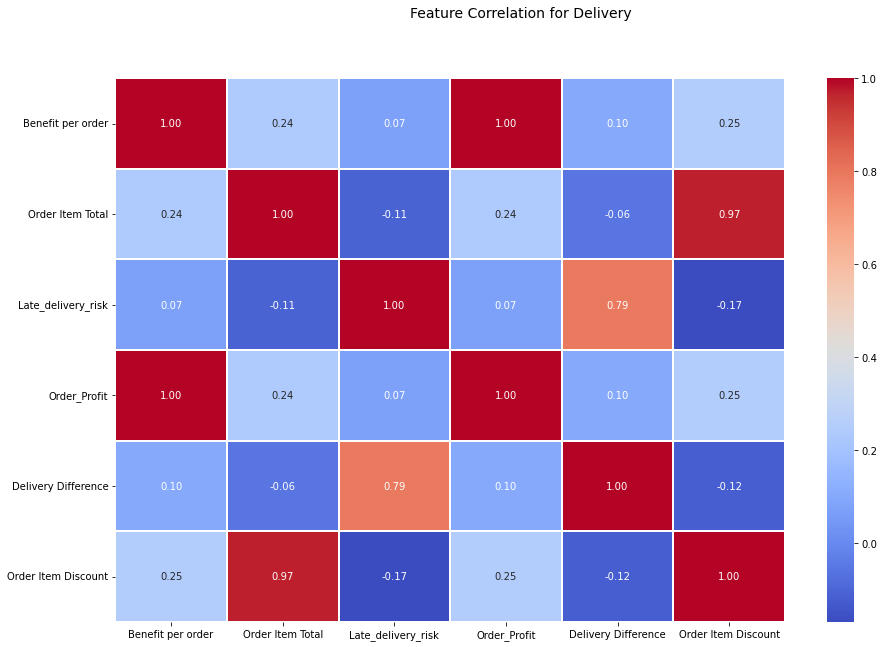

In [99]:
corr = df4_feat.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
#f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for Delivery', fontsize=14)